<a href="https://colab.research.google.com/github/drAshcroft/MAT422/blob/main/HW_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt

 #generate  random large matrix
a = np.random.randn(5, 5)
#gerate a solution vector
x= np.random.randn(5)
#create the output for this solution
b=np.dot(a,x)



In [13]:
#check the routine and determine if it can reproduce the original matrix

U, S, Vh = np.linalg.svd(a, full_matrices=True)
print(U.shape, S.shape, Vh.shape)

print('MSE in SVD',end='')
print( np.sum( np.power( a- np.dot(U * S, Vh),2)**.5/(U.shape[0]*U.shape[1])))




(5, 5) (5,) (5, 5)
MSE in SVD4.496403249731884e-16


With the SVD formation, the matrix can be simplified by removing columns indexed by S.  We now estimate the error for removing each column in the correct approximation of a

In [14]:
smat = np.zeros(U.shape )
smat[:, :] = np.diag(S)

approx=np.dot(U, np.dot(smat, Vh))

print(  np.sum( np.power(a-approx,2))**.5/(U.shape[0]*U.shape[1]) )


1.2462222543165673e-16


In [15]:
smat = np.zeros(U.shape )
smat[:, :] = np.diag(S)

print('Columns Removed,MSE error for this approximation:')
approx=np.dot(U, np.dot(smat, Vh))
print( 0, np.sum( np.power(a-approx,2))**.5/(U.shape[0]*U.shape[1]) )

for i in range(U.shape[0]-1,0,-1):
  smat[i,i]=0
  approx=np.dot(U, np.dot(smat, Vh))
  print( U.shape[0]-i, np.sum( np.power(a-approx,2))**.5/(U.shape[0]*U.shape[1]) )

Columns Removed,MSE error for this approximation:
0 1.2462222543165673e-16
1 0.011755065758750119
2 0.030082393974026348
3 0.09511688407162348
4 0.13752853059504258


Principle Component Analysis allows us to reduce the dimensionality of a matrix or dataset to allow easier analysis.  The routine rotates the dataset such that axis with the largest variance falls on the first axis.

In [16]:

from sklearn.decomposition import PCA

X = np.random.randn(500, 5)
#add in some asymetry to the normally generated data
X[:,1] = X[:,1]*3
X[:,4] = X[:,4]*2
#create second dataset with different distribution
X2 = np.random.randn(500, 5)
X2[:,2] = X2[:,2]*6
X2[:,3] = X2[:,3]*5


pca = PCA(n_components=X.shape[1])
pca.fit( np.concatenate( [X,X2]))

print('Show how much of the data variance can be explained by each of the generated columns')
print(pca.explained_variance_ratio_)
print('\nThe singular values of each of the generated columns.  or the 2-norm values in 2D space')
print(pca.singular_values_)
print('\nCovariance matrix')
pca.get_covariance()



Show how much of the data variance can be explained by each of the generated columns
[0.49127348 0.30191825 0.12228081 0.06064126 0.02388621]

The singular values of each of the generated columns.  or the 2-norm values in 2D space
[143.87639218 112.79051064  71.78059063  50.54893243  31.72498973]

Covariance matrix


array([[ 1.01394118e+00, -6.32778522e-03,  2.69379812e-01,
        -1.78551451e-01, -9.05569300e-03],
       [-6.32778522e-03,  5.15498675e+00, -3.16362934e-02,
         2.05774561e-01,  1.44819710e-01],
       [ 2.69379812e-01, -3.16362934e-02,  2.07159720e+01,
        -6.87504624e-02,  1.18717502e-01],
       [-1.78551451e-01,  2.05774561e-01, -6.87504624e-02,
         1.27265899e+01, -5.16147294e-02],
       [-9.05569300e-03,  1.44819710e-01,  1.18717502e-01,
        -5.16147294e-02,  2.56692688e+00]])

We can visualize the difference of the transformation by reducing the dataset to a 2D system and then plotting the points

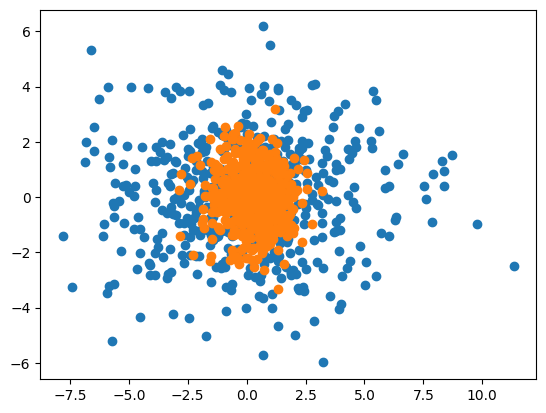

In [20]:
X_new= pca.transform(X)
X2_new = pca.transform(X2)

plt.scatter(X_new[:,0],X_new[:,1])
plt.scatter(X2_new[:,0],X2_new[:,1])
plt.show()